# EDA

### 패키지 임포트

In [ ]:
import os
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

# pandas에서 progress bar 보는 설정
from tqdm.auto import tqdm as tqdmp
tqdmp.pandas()

# warning 무시
import warnings
warnings.simplefilter("ignore")

### 데이터 살펴보기

In [ ]:
data_path = 'data'
os.listdir(data_path)

['test.csv',
 'train.csv',
 'train_images',
 'sample_submission.csv',
 'test_images']

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
print(f'train df shape {train_df.shape}')
print('train df posting_id unique values {}'.format(train_df['posting_id'].nunique()))
print('train df label_group unique values {}'.format(train_df['label_group'].nunique()))

train df shape (34250, 6)
train df posting_id unique values 34250
train df label_group unique values 11014


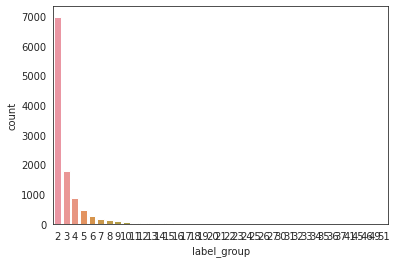

In [ ]:
sns.countplot(train_df['label_group'].value_counts())
plt.show()

In [ ]:
train_df['path'] = data_path + "/train_images/" + train_df['image']

train_df.head()

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,data/train_images/0000a68812bc7e98c42888dfb1c0...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,data/train_images/00039780dfc94d01db8676fe789e...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,data/train_images/000a190fdd715a2a36faed16e2c6...
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,data/train_images/00117e4fc239b1b641ff08340b42...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,data/train_images/00136d1cf4edede0203f32f05f66...


In [ ]:
train_df['img_shape'] = train_df['path'].progress_apply(lambda x: cv2.imread(x).shape)

  0%|          | 0/34250 [00:00<?, ?it/s]

정사각형이 아닌 이미지 개수 : 118


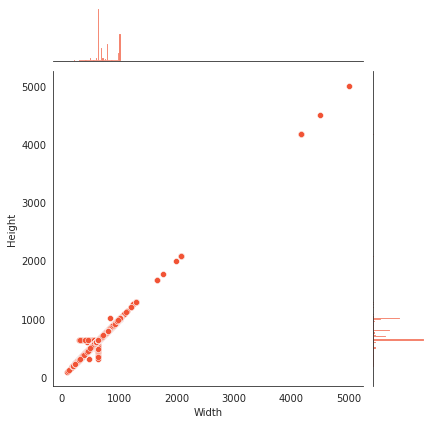

In [ ]:
shapes = pd.DataFrame().from_records(train_df['img_shape'])
shapes.columns = ['Width', 'Height', 'Colors']

print('정사각형이 아닌 이미지 개수 : {}'.format(len(shapes[shapes['Width'] != shapes['Height']])))

sns.set_style("white")
sns.jointplot(x = shapes.iloc[:, 0].astype('float32'), 
              y = shapes.iloc[:, 1].astype('float32'),
              height = 6, color = '#f15335')
plt.show()

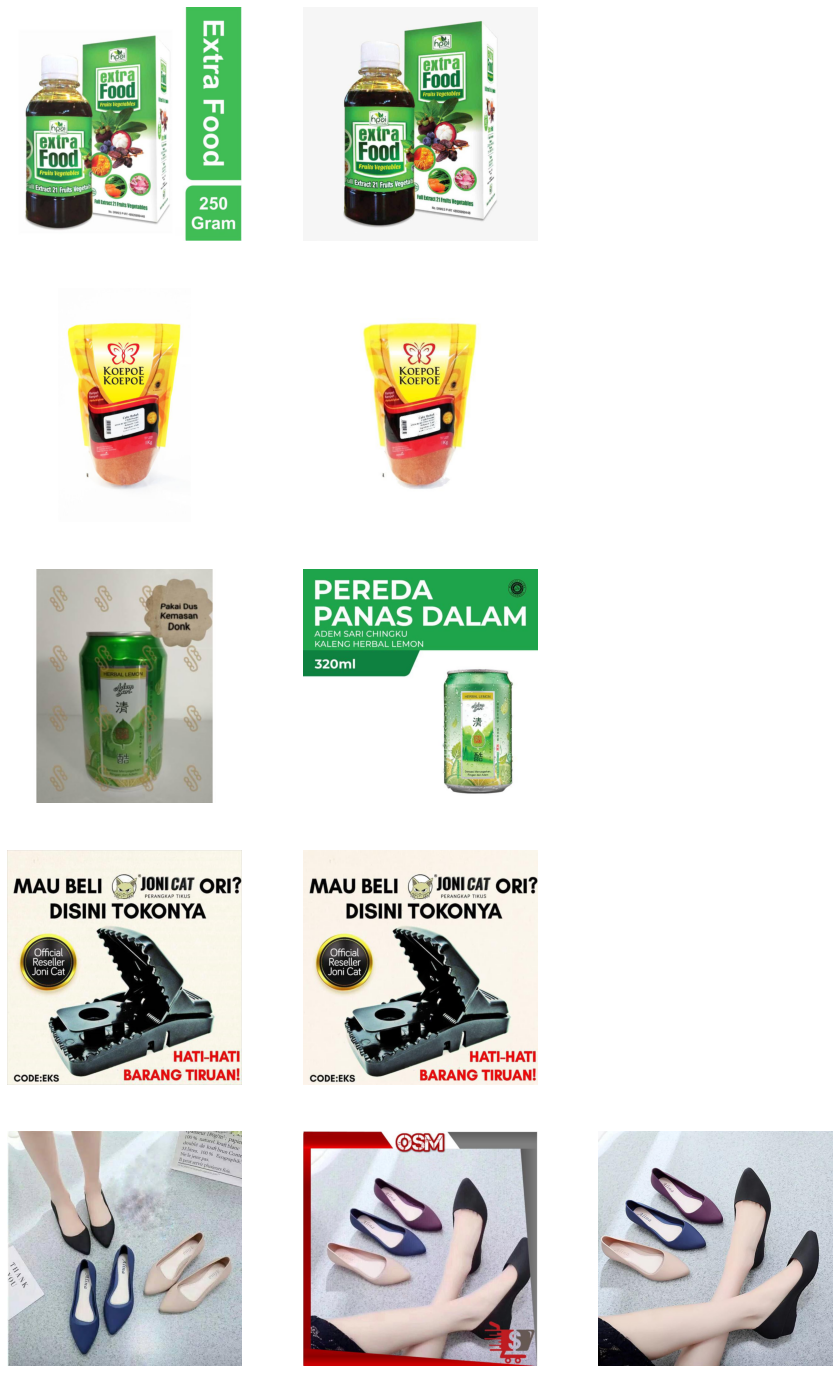

In [ ]:
import random

# 출력할 label 개수
num_sample = 5
label_samples = random.sample(list(train_df['label_group'].unique()), num_sample)

plt.figure(figsize = (15, 5*num_sample))
for i, label in enumerate(label_samples):
    for j, image_path in enumerate(train_df[train_df['label_group'] == label]['path']):
        # 동일 label의 개수가 3개가 넘더라도 3개까지만 출력
        if j == 3:
            break

        plt.subplot(len(label_samples), 3, 3*i+j+1)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        plt.imshow(img)
        plt.axis('off')

plt.show()